In [3]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

# load data

In [4]:
df1_ori=pd.read_csv('BBB_planA_monthly.csv', low_memory = False)

In [5]:
df1_ori

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,id1
0,1,13.0,38.0,88.0,14.0,126.0,67.0,124.0,152.0,83.0,34.0,0
1,1,7.0,42.0,22.0,7.0,101.0,46.0,14.0,62.0,0.0,0.0,1
2,0,71.0,333.0,510.0,38.0,139.0,247.0,119.0,157.0,62.0,12.0,2
3,1,117.0,72.0,211.0,131.0,244.0,483.0,193.0,409.0,138.0,0.0,3
4,0,2.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,1,64.0,95.0,62.0,74.0,73.0,48.0,56.0,70.0,89.0,0.0,5336
5337,0,32.0,74.0,159.0,81.0,38.0,15.0,75.0,23.0,56.0,0.0,5337
5338,1,562.0,675.0,770.0,756.0,856.0,374.0,425.0,218.0,206.0,0.0,5338
5339,0,0.0,27.0,29.0,75.0,1.0,9.0,64.0,17.0,43.0,0.0,5339


In [6]:
df1_sorted=df1_ori.sort_values(by=['id1'])
df1_sorted.head(10)

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,id1
0,1,13.0,38.0,88.0,14.0,126.0,67.0,124.0,152.0,83.0,34.0,0
1,1,7.0,42.0,22.0,7.0,101.0,46.0,14.0,62.0,0.0,0.0,1
2,0,71.0,333.0,510.0,38.0,139.0,247.0,119.0,157.0,62.0,12.0,2
3,1,117.0,72.0,211.0,131.0,244.0,483.0,193.0,409.0,138.0,0.0,3
4,0,2.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
5,1,52.0,140.0,98.0,70.0,43.0,77.0,89.0,32.0,27.0,0.0,5
6,1,27.0,138.0,127.0,35.0,53.0,43.0,69.0,37.0,11.0,61.0,6
7,1,0.0,78.0,148.0,49.0,44.0,68.0,39.0,15.0,78.0,0.0,7
8,1,169.0,642.0,579.0,97.0,160.0,44.0,79.0,128.0,53.0,34.0,8
9,0,0.0,11.0,24.0,0.0,13.0,16.0,72.0,20.0,5.0,0.0,9


In [7]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   final_result  5341 non-null   int64  
 1   T0            5341 non-null   float64
 2   T1            5341 non-null   float64
 3   T2            5341 non-null   float64
 4   T3            5341 non-null   float64
 5   T4            5341 non-null   float64
 6   T5            5341 non-null   float64
 7   T6            5341 non-null   float64
 8   T7            5341 non-null   float64
 9   T8            5341 non-null   float64
 10  T9            5341 non-null   float64
 11  id1           5341 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 542.4 KB


# prepare dataset for y

In [8]:
y = df1_sorted['final_result']

# prepare dataset for X

In [9]:
X=df1_sorted.drop(['final_result','id1'], axis=1)

In [10]:
X.shape

(5341, 10)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled.shape

(5341, 10)

In [12]:
X=X_scaled.reshape(X_scaled.shape[0],1,10)
X.shape

(5341, 1, 10)

In [13]:
from sklearn.model_selection import KFold
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 5337 5339 5340] TEST: [   8   15   23   29   33   65   79   80   84   88  106  107  132  144
  151  157  167  168  179  199  227  228  230  239  240  245  248  251
  254  272  279  290  292  296  297  315  333  346  351  373  393  401
  410  416  418  422  426  439  443  465  468  471  472  485  486  491
  497  501  505  530  534  538  544  553  555  577  584  589  599  624
  625  626  642  653  655  683  691  696  705  721  724  734  742  746
  748  751  763  776  787  794  798  803  807  810  811  812  829  838
  848  881  898  907  911  915  926  957  964  969  977  994  996 1020
 1025 1032 1038 1044 1049 1073 1084 1086 1094 1103 1126 1128 1158 1163
 1168 1173 1188 1194 1197 1209 1215 1220 1223 1281 1292 1302 1319 1322
 1330 1344 1351 1360 1397 1406 1411 1412 1421 1438 1468 1471 1476 1477
 1480 1487 1504 1526 1533 1553 1557 1561 1580 1612 1615 1618 1620 1623
 1652 1658 1665 1666 1669 1672 1705 1743 1744 174

 5300 5303]
TRAIN: [   0    1    2 ... 5338 5339 5340] TEST: [  22   41   57   59   78   86   87   91  104  115  118  123  147  163
  172  182  187  212  226  231  234  237  243  261  265  282  313  340
  347  361  363  365  369  389  392  398  399  405  407  421  424  435
  448  456  460  462  464  475  480  487  496  509  521  522  541  542
  560  593  597  601  632  641  651  656  662  685  689  697  702  707
  739  741  758  767  772  779  782  799  819  834  844  845  855  867
  882  900  940  962  982  997 1019 1031 1036 1037 1048 1053 1067 1070
 1078 1079 1080 1093 1099 1124 1132 1133 1134 1140 1153 1203 1206 1232
 1234 1271 1283 1284 1326 1337 1339 1352 1368 1373 1376 1382 1403 1404
 1414 1416 1423 1428 1430 1442 1446 1452 1459 1465 1492 1494 1506 1508
 1511 1523 1549 1575 1582 1587 1601 1613 1638 1651 1653 1674 1676 1688
 1689 1725 1731 1735 1754 1766 1775 1778 1791 1795 1805 1811 1821 1830
 1836 1850 1866 1882 1884 1923 1929 1938 1940 1948 1950 1953 1960 1979
 2001 2010 2023 

# build LSTM model

In [14]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.0001
    epochs = 500
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(LSTM(8, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                  metrics=['accuracy','Recall','Precision', 'AUC'])
    print(model.summary())
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=0)
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             5504      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8935 - recall: 0.9549 - precision: 0.9000 - auc: 0.9314
0.8934579491615295
0.9266409220433848
0.9314374327659607

Running a new one...

 # of train:4807; # of tes

17/17 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8970 - recall: 0.9532 - precision: 0.9084 - auc: 0.9261
0.8970037698745728
0.9302915238050481
0.9260699152946472

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 32)             5504      
                                                                 
 lstm_17 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,825
Trainable params: 6,825
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 3ms

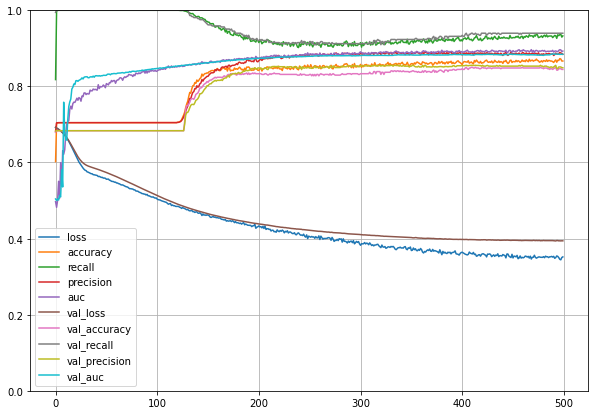

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

88.07% (+/- 1.64%)
91.80% (+/- 1.16%)
89.45% (+/- 2.04%)

lr=0.0001
    epochs = 500
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(LSTM(16, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))

87.92% (+/- 1.62%)
91.73% (+/- 1.14%)
90.13% (+/- 1.74%)

lr=0.0001
    epochs = 500
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(LSTM(8, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))